# Predicting the likelihood of heart attacks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Dataset: Metadata and import

*About this dataset*

1. Age : Age of the patient

2. Sex : Sex of the patient (1 = male, 0 = female)

3. exang: exercise induced angina (1 = yes; 0 = no)

4. cp : Chest Pain type chest pain type

- Value 0: asymptomatic
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain

5. trtbps : resting blood pressure (in mm Hg)

6. chol : cholestoral in mg/dl fetched via BMI sensor

7. fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

8. rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

9. thalach : maximum heart rate achieved

10. oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot)

11. slope: the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

12. ca: The number of major vessels (0–3)

13. thal: A blood disorder called thalassemia 
- Value 0: NULL 
- Value 1: fixed defect (no blood flow in some part of the heart)
- Value 2: normal blood flow
- Value 3: reversible defect (a blood flow is observed but it is not normal)

14. target : 
- 0= less chance of heart attack 
- 1= more chance of heart attack

In [2]:
df = pd.read_csv('heart.csv').drop_duplicates()

### Distribution of the data in the dataset

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Based on the data description, unique values in each column along with the finding that none of the columns have any Null values we have identified the categorical and continuous independent variables in the dataset. So I will create lists containing the independent variables of both types for use throughout our project

In [4]:
str_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
num_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Very low blood pressure or high cholestrol can be a cause of heart attack

## Classification Modeling

### 1. Preparing the data for modeling

#### A.  Splitting data into training and testing

First I want to make the dataframe more readable before transformations to track back categorical encoding 

In [6]:
model_data = df.copy(deep=True)

# For chest pain (cp) column
conditions = [model_data.cp == 0, model_data.cp == 1, model_data.cp == 2, model_data.cp == 3]
choices = ['Asymptomatic', 'Typical angina', 'Atypical angina', 'Non-anginal pain']
model_data['cp'] = np.select(condlist= conditions, choicelist=choices)

# For slope during ST exercise
conditions = [model_data.slp == 0, model_data.slp == 1, model_data.slp == 2 ]
choices = ['Downsloping', 'Flat', 'Upsloping']
model_data['slp'] = np.select(condlist= conditions, choicelist=choices)

# For thallasemia
conditions = [model_data.thall == 0, model_data.thall == 1, model_data.thall == 2, model_data.thall == 3 ]
choices = ['None', 'Fixed Defect', 'Normal Flow', 'Reversible Defect']
model_data['thall'] = np.select(condlist= conditions, choicelist=choices)

In [7]:
model_data = model_data[['sex', 'fbs', 'restecg', 'exng', 'caa', 'cp', 'slp', 'thall', 
                        'age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']]

In [8]:
model_data.columns

Index(['sex', 'fbs', 'restecg', 'exng', 'caa', 'cp', 'slp', 'thall', 'age',
       'trtbps', 'chol', 'thalachh', 'oldpeak', 'output'],
      dtype='object')

I re-arranged the columns to make sure that all columns that need to be encoded will be at the end of the dependent variable dataset (X) once we divide model_data into X & y.

In [9]:
X = model_data.drop(columns=['output'])
y = model_data['output']

In [10]:
X[0:10]

,sex,fbs,restecg,exng,caa,cp,slp,thall,age,trtbps,chol,thalachh,oldpeak
0,1,1,0,0,0,Non-anginal pain,Downsloping,Fixed Defect,63,145,233,150,2.3
1,1,0,1,0,0,Atypical angina,Downsloping,Normal Flow,37,130,250,187,3.5
2,0,0,0,0,0,Typical angina,Upsloping,Normal Flow,41,130,204,172,1.4
3,1,0,1,0,0,Typical angina,Upsloping,Normal Flow,56,120,236,178,0.8
4,0,0,1,1,0,Asymptomatic,Upsloping,Normal Flow,57,120,354,163,0.6
5,1,0,1,0,0,Asymptomatic,Flat,Fixed Defect,57,140,192,148,0.4
6,0,0,0,0,0,Typical angina,Flat,Normal Flow,56,140,294,153,1.3
7,1,0,1,0,0,Typical angina,Upsloping,Reversible Defect,44,120,263,173,0.0
8,1,1,1,0,0,Atypical angina,Upsloping,Reversible Defect,52,172,199,162,0.5
9,1,0,1,0,0,Atypical angina,Upsloping,Normal Flow,57,150,168,174,1.6


#### B. Encoding the categorical data

The categorical columns need to be encoded in order for the models to preform their best. Below is a list of all the categorical columns and a plan for their encoding:
1. Sex, Fast blood sugar (fbs), Exercise induced angina (exng) - These columns already contain just 0 & 1 so we don't need to encode it.
2. Chest pain (cp), thall, slope (slp) - These variables need to be encoded and treated for dummy variable trap.
3. restecg - This categorical variable is ordinal in nature and is already has those values in-built

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5,6,7])], remainder='passthrough')

X = pd.DataFrame(ct.fit_transform(X)) # Encoded variables appear at the beginning of the array

X.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,63.0,145.0,233.0,150.0,2.3
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,37.0,130.0,250.0,187.0,3.5
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,41.0,130.0,204.0,172.0,1.4
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,56.0,120.0,236.0,178.0,0.8
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,57.0,120.0,354.0,163.0,0.6


In [12]:
ran = pd.merge(X[:11], model_data[['cp', 'slp', 'thall']], left_index=True, right_index=True)
ran = ran[[0,1,2,3,4,5,6,7,8,9,10,'cp', 'slp', 'thall']]
ran.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,10,cp,slp,thall
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,Non-anginal pain,Downsloping,Fixed Defect
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Atypical angina,Downsloping,Normal Flow
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Typical angina,Upsloping,Normal Flow
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Asymptomatic,Upsloping,Normal Flow
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Asymptomatic,Flat,Fixed Defect
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Typical angina,Flat,Normal Flow
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Typical angina,Upsloping,Reversible Defect
8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Atypical angina,Upsloping,Reversible Defect
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Atypical angina,Upsloping,Normal Flow


For record-keeping, this was the order of dummy variable column values

A. cp
- Asmptomatic - Col 0
- Atypical Angina - Col 1
- Non-anginal angina - Col 2
- Typical Angina - Col 3 (Dropping this column)

B. slp
- Downslope - Col 4
- Flat - Col 5
- Upslope - Col 6 (Dropping this column)

C. Thall
- Fixed Defect - Col 7
- Reversible Defect - Col 8
- Normal - Col 9
- Reversible defect - Column 10 (Dropping this column)

In [13]:
# Dropping all the extra dummy variable columns from X to avoid dummy variable trap
X.drop(X.columns[[3, 6, 10]],axis = 1, inplace=True)

# Converting X back into an array for further processing
X=np.array(X)

Now let's split the input and output arrays into Training and Testing datasets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0, test_size=0.25)

In [15]:
X_train_wo_scale, X_test_wo_scale, y_train_wo_scale, y_test_wo_scale = \
    train_test_split(X, y,random_state=0, test_size=0.25)

#### C. Feature scaling
Next we will scale the continuous variables. For this project I am using the Standard Scaler library. I will fit the Scaler using X_train and then use it to transform both X_train and X_test.

In [16]:
X_train[0:10]

array([[  1. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   1. ,
          0. ,   0. ,   1. ,   2. ,  60. , 130. , 206. , 132. ,   2.4],
       [  1. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   1. ,
          0. ,   1. ,   1. ,   2. ,  53. , 123. , 282. ,  95. ,   2. ],
       [  0. ,   1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,
          0. ,   0. ,   0. ,   0. ,  54. , 150. , 232. , 165. ,   1.6],
       [  0. ,   0. ,   1. ,   1. ,   0. ,   0. ,   0. ,   0. ,   1. ,
          0. ,   0. ,   0. ,   0. ,  59. , 178. , 270. , 145. ,   4.2],
       [  1. ,   0. ,   0. ,   1. ,   0. ,   0. ,   0. ,   1. ,   0. ,
          0. ,   0. ,   0. ,   2. ,  62. , 140. , 268. , 160. ,   3.6],
       [  1. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. ,   1. ,   1. ,
          0. ,   0. ,   0. ,   3. ,  70. , 130. , 322. , 109. ,   2.4],
       [  1. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   1. ,   1. ,
          0. ,   0. ,   0. ,   1. ,  44. , 112. , 290. , 153. ,   0. ],

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# This way we fit the scaler and transform the Training dataset in one step
X_train[:,12:] = scaler.fit_transform(X_train[:,12:])

In [18]:
X_train[0:3]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.25507175,  0.59073308, -0.10800156,
        -0.75925455, -0.72293166,  1.07010711],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  1.        ,  1.25507175, -0.17970363, -0.5044249 ,
         0.66256797, -2.28822285,  0.73801757],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        , -0.71469364, -0.06964124,  1.02463656,
        -0.27284158,  0.67313885,  0.40592803]])

In [19]:
# Now we transform X_test using the Scaler that has learnt from X_train
X_test[:,12:] = scaler.transform(X_test[:,12:])

In [20]:
X_train

array([[ 1.        ,  0.        ,  0.        , ..., -0.75925455,
        -0.72293166,  1.07010711],
       [ 1.        ,  0.        ,  0.        , ...,  0.66256797,
        -2.28822285,  0.73801757],
       [ 0.        ,  1.        ,  0.        , ..., -0.27284158,
         0.67313885,  0.40592803],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -1.00246104,
         0.54622335,  0.65499518],
       [ 0.        ,  1.        ,  0.        , ...,  0.19486319,
         0.29239235, -0.92243012],
       [ 0.        ,  1.        ,  0.        , ..., -0.42250711,
         1.01158019,  1.73428618]])

### 2. Trying out different classification models

#### A. Logistic Regression

##### Scikit Learn Model

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

Resolved above issue through this link: https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

In [24]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0,solver='lbfgs', max_iter=1000)
log_classifier.fit(X_train, y_train)

y_pred = log_classifier.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[25  8]
 [ 5 38]]


0.8289473684210527

In [26]:
# Recall
cm[0][0]/(cm[0][0]+cm[1][0])

0.8333333333333334

In [27]:
# Let's look at cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_classifier, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.7826087  0.86956522 0.86956522 0.82608696 0.91304348 0.82608696
 0.90909091 0.81818182 0.95454545 0.86363636]


In [28]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.782608695652174, 0.8632411067193676, 0.9545454545454546)

In [29]:
parameters = log_classifier.coef_
parameters

array([[-0.96522027,  0.38159199,  0.58355288,  0.0232746 , -0.75040677,
         0.64352106, -0.07458798,  1.24715277, -1.51682852, -0.0670187 ,
        -0.01427391, -0.39345359, -0.97264019,  0.15461263, -0.26427394,
        -0.19660083,  0.45941056, -0.55558466]])

In [30]:
X_test[:,1].squeeze

<function ndarray.squeeze>

<AxesSubplot:>

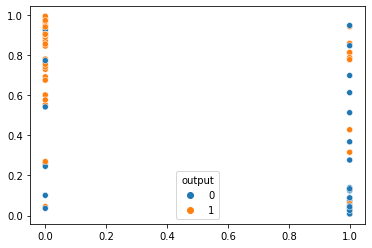

In [31]:
# Now let's visually try to understand the relationship between Asymptotic chest pain with the prediction
x_test_view = X_test[:,0].squeeze()

y_prob = log_classifier.predict_proba(X_test)
sns.scatterplot(x = x_test_view, y = y_prob[:,1], hue = y_test)

In [32]:
log_classifier.predict_proba(X_test[1:10])
# Column 0: Probablity of Class 0 (no heart attack)
# Column 1: Probablity of Class 1 (heart attack)

array([[0.44688037, 0.55311963],
       [0.73971383, 0.26028617],
       [0.86839931, 0.13160069],
       [0.95501011, 0.04498989],
       [0.95654305, 0.04345695],
       [0.92645167, 0.07354833],
       [0.86120732, 0.13879268],
       [0.97329612, 0.02670388],
       [0.96804216, 0.03195784]])

In [33]:
log_classifier2 = LogisticRegression(random_state = 0, penalty='l2', solver='lbfgs', max_iter=100, C=1)
log_classifier2.fit(X_train, y_train)

y_pred2 = log_classifier2.predict(X_test)

In [34]:
print(confusion_matrix(y_test, y_pred2))
accuracy_score(y_test, y_pred2)

[[25  8]
 [ 5 38]]


0.8289473684210527

In [35]:
# Let's look at cross-validation
scores2 = cross_val_score(log_classifier2, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores2)

Cross-Validation Accuracy Scores [0.7826087  0.86956522 0.86956522 0.82608696 0.91304348 0.82608696
 0.90909091 0.81818182 0.95454545 0.86363636]


In [38]:
# RFE stands for Recursive feature selection 
from sklearn.feature_selection import RFE
selector = RFE(log_classifier, step=1)
selector.fit(X_train, y_train)

# Ranking of importance of feature. 1 being the most important feature, 2 being the second important feature and so on
print("\nRanking of features is: {}".format(selector.ranking_))

selected_features_indices = selector.support_

print("\nSelected Indices are: {}".format(selected_features_indices))

X_train_subset = X_train[:,selected_features_indices]
print("\nSubset of X_train: {}".format(X_train_subset))


Ranking of features is: [ 1  2  1  9  1  1  7  1  1  8 10  1  1  6  4  5  3  1]

Selected Indices are: [ True False  True False  True  True False  True  True False False  True
  True False False False False  True]

Subset of X_train: [[ 1.          0.          1.         ...  1.          1.25507175
   1.07010711]
 [ 1.          0.          1.         ...  1.          1.25507175
   0.73801757]
 [ 0.          0.          0.         ...  0.         -0.71469364
   0.40592803]
 ...
 [ 0.          1.          1.         ...  0.         -0.71469364
   0.65499518]
 [ 0.          0.          0.         ...  0.         -0.71469364
  -0.92243012]
 [ 0.          0.          0.         ...  0.          1.25507175
   1.73428618]]


In [41]:
# Let's train the classifier again
log_classifier.fit(X_train_subset, y_train)

y_pred = log_classifier.predict(X_test[:,selected_features_indices])

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n{}".format(cm))
print("Accuracy score for single trainer: {}".format(accuracy_score(y_test, y_pred)))

scores = cross_val_score(log_classifier, X_train_subset, y_train, cv=10)
print('Cross-Validation Accuracy Scores: {}', scores)

Confusion Matrix: 
[[26  7]
 [ 5 38]]
Accuracy score for single trainer: 0.8421052631578947
Cross-Validation Accuracy Scores: {} [0.7826087  0.86956522 0.86956522 0.86956522 0.86956522 0.7826087
 0.90909091 0.72727273 0.86363636 0.77272727]


##### Using statsmodel package


Questions:
1. Do statsmodels take care of feature scaling?
2. 

In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

In [60]:
# Creating copy of model data for using statsmodels package
model_data2= model_data.copy(deep=True)
model_data2.dropna(inplace=True)

To fit most of the models covered by statsmodels, you will need to create two design matrices. The first is a matrix of endogenous variable(s) (i.e. dependent, response, regressand, etc.). The second is a matrix of exogenous variable(s) (i.e. independent, predictor, regressor, etc.).

The patsy module provides a convenient function to prepare design matrices using R-like formulas. You can find more information here.

We use patsy’s dmatrices function to create design matrices:

In [61]:
y2, X2 = dmatrices('output ~ sex + fbs + restecg + exng + caa + cp + slp + thall + age + trtbps + chol+ thalachh + oldpeak'\
                 , data=model_data2, return_type='dataframe')


In [62]:
X2[1:3]

,Intercept,cp[T.Atypical angina],cp[T.Non-anginal pain],cp[T.Typical angina],slp[T.Flat],slp[T.Upsloping],thall[T.None],thall[T.Normal Flow],thall[T.Reversible Defect],sex,fbs,restecg,exng,caa,age,trtbps,chol,thalachh,oldpeak
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,37.0,130.0,250.0,187.0,3.5
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,130.0,204.0,172.0,1.4


In [63]:
y2

,output
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
298,0.0
299,0.0
300,0.0
301,0.0


In [64]:
# log_statsm = smf.logit(formula='output ~ sex + fbs + restecg + exng + caa + cp + slp + thall + age + trtbps + chol+ thalachh + oldpeak', data=model_data).fit()
log_statsm = sm.Logit(endog=y2, exog=X2).fit()
    

Optimization terminated successfully.
         Current function value: 0.333039
         Iterations 7


In [65]:
log_statsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  302
Model:                          Logit   Df Residuals:                      283
Method:                           MLE   Df Model:                           18
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.5169
Time:                        20:45:17   Log-Likelihood:                -100.58
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 8.693e-36
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.8782      2.744      1.049      0.294      -2.500       8.256
cp[T.Atypical angina]          1.9107      0.479      3.990      0.000       0.972       2.849
cp[T.Non-anginal pain]         2.0187      0.650      3.106      0.002       0.745       3.293
cp[T.Typical angina]           0.9850      0.565      1.744      0.081      -0.122       2.092
slp[T.Flat]                   -0.7198      0.857     -0.840      0.401      -2.400       0.960
slp[T.Upsloping]               0.2194      0.932      0.235      0.814      -1.607       2.046
thall[T.None]                 -1.8226      2.374     -0.768      0.443      -6.476       2.831
thall[T.Normal Flow]           0.0153      0.769      0.020      0.984      -1.492       1.523
thall[T.Reversible Defect]    -1.3400      0.758     -1.769      0.077      -2.825       0.145
sex                           -1.4923      0.516     -2.890      0.004      -2.505      -0.480
fbs                            0.2217      0.570      0.389      0.697      -0.896       1.339
restecg                        0.4926      0.360      1.367      0.171      -0.213       1.199
exng                          -0.7717      0.426     -1.810      0.070      -1.607       0.064
caa                           -0.8823      0.214     -4.118      0.000      -1.302      -0.462
age                            0.0024      0.024      0.102      0.919      -0.044       0.049
trtbps                        -0.0184      0.011     -1.739      0.082      -0.039       0.002
chol                          -0.0043      0.004     -1.098      0.272      -0.012       0.003
thalachh                       0.0176      0.011      1.642      0.101      -0.003       0.039
oldpeak                       -0.4901      0.224     -2.187      0.029      -0.929      -0.051
==============================================================================================
"""

Let's choose the attributes with p<0.05 because only those have a statistically significant effect on the log odds of heart attack. Those variables are- Atypical angina cp, Non-Anginal pain cp, sex, caa, oldpeak

Interpretation of some variables:

1. Chest Pain: Having Atypical Angina instead of having asymptomatic chest pain, increases the log-odds of having heart attack (v/s no heart attack) by 1.9
2. Chest Pain: Having Non-Anginal pain instead of having asymptomatic chest pain, increases the log-odds of having heart attack (v/s no heart attack) by 2.02
3. Sex: Being a male reduces the log odds of getting a heart attack by 1.5
4. caa - One unit increase in caa decreases the log odds of a heart attack by 0.88



**Q. The intercept seems to be statistically insignificant in the summary, what does that mean and should it be removed?**

For any model (OLS, Logistic Regression, Linear or Nonlinear), a model with no response assumes that if all predictors are zero then the output of the model is zero.

Here are the use cases where intercept can be removed if it is insignificant in a Linear model:
1. If the nature of the model is to assume that when all predictors are zero, the output should be zero then it is okay to remove an insignificant intercept
2. If the values of predictors are very far from the origin and the model is extrapolated to find intercept.

Here are the use cases where intercept should be used even if insignificant:
1. When the assumption isn't to predict zero for predictors are zero or close to zero.
2. Intercept is used to reduce noise in the model so it might be good to have it as a cushion to help with model's predictions
3. The model might have too many regressors and have collinearity and/or other problems. Sometimes it helps to drop attributes and look at the new intercept.

Source: http://support.sas.com/kb/23/136.html#:~:text=So%2C%20a%20highly%20significant%20intercept,the%20predictors%20are%20all%20zero.
https://www.researchgate.net/post/In_multiple_regression_if_the_constant_is_not_significant_but_the_other_variables_are_in_the_coefficient_table_what_does_this_mean2
https://stats.stackexchange.com/questions/160628/linear-regression-intercept-isnt-significant

Decision on Intercept-: 
I want to keep the intercept term because:
1. I don't want my model to predict no heart attack if all predictors are zero as for me False Positives are less risky than getting False Negatives 
2. I want to make my model smaller using only statistically significant attributes.

In [66]:
log_statsm2 = smf.logit(formula='output ~ sex + caa + cp + oldpeak', data=model_data).fit()
log_statsm2.summary()

Optimization terminated successfully.
         Current function value: 0.409257
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  302
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            6
Date:                Sat, 08 Apr 2023   Pseudo R-squ.:                  0.4064
Time:                        20:45:18   Log-Likelihood:                -123.60
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 6.555e-34
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.4553      0.389      3.738      0.000       0.692       2.218
cp[T.Atypical angina]      2.3629      0.407      5.801      0.000       1.565       3.161
cp[T.Non-anginal pain]     2.3105      0.584      3.955      0.000       1.166       3.455
cp[T.Typical angina]       1.7590      0.467      3.766      0.000       0.844       2.674
sex                       -1.4027      0.377     -3.719      0.000      -2.142      -0.663
caa                       -0.7916      0.172     -4.592      0.000      -1.129      -0.454
oldpeak                   -0.8483      0.176     -4.831      0.000      -1.192      -0.504
==========================================================================================
"""

How to interpret p > |z|


The value of 0.000 in the P>|z| column for the attributes shows that the effect of each attribute on Outcome is statistically significant at conventional levels of significance. Thus, we can have confidence that the relationship between each of these independent attributes and heart attack observed in this dataset is unlikely to be solely attributable to sampling error. The values in the `[0.025 and 0.975]` columns provide the 95% confidence interval for the regression weight for each independent attribute. The fact that the 95% confidence interval for the attributes does not cross the value of 0 also tells us that their effect on heart attack in this model is statistically significant, at the 5% level of significance.

In [67]:
y_pred_statsm = log_statsm.predict(X2)

y_pred_statsm

0      0.835834
1      0.881751
2      0.963506
3      0.940373
4      0.861616
         ...   
298    0.297058
299    0.629643
300    0.014491
301    0.038611
302    0.888577
Length: 302, dtype: float64

**C. Decision Tree Classification**

I want to try Decision Tress with and without feature scaling. And also apply post pruning to help prevent over-fitting

In [43]:
X_train_wo_scale

array([[  1. ,   0. ,   0. , ..., 206. , 132. ,   2.4],
       [  1. ,   0. ,   0. , ..., 282. ,  95. ,   2. ],
       [  0. ,   1. ,   0. , ..., 232. , 165. ,   1.6],
       ...,
       [  0. ,   0. ,   1. , ..., 193. , 162. ,   1.9],
       [  0. ,   1. ,   0. , ..., 257. , 156. ,   0. ],
       [  0. ,   1. ,   0. , ..., 224. , 173. ,   3.2]])

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

tree_classifier_wo_scaling = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
tree_classifier_wo_scaling.fit(X_train_wo_scale, y_train_wo_scale)

y_pred_tree_wo_scale = tree_classifier_wo_scaling.predict(X_test_wo_scale)

print("Confusion Matrix:\n{}".format(confusion_matrix(y_test_wo_scale, y_pred_tree_wo_scale)))

print("Accuracy: {}".format(accuracy_score(y_test_wo_scale, y_pred_tree_wo_scale)))

Confusion Matric:
[[26  7]
 [ 9 34]]
Accuracy: 0.7894736842105263


Using Gini impurity as cost function did a better job than entropy here

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree_classifier_wo_scaling, X_train_wo_scale, y_train_wo_scale, cv= 10)

array([0.69565217, 0.69565217, 0.7826087 , 0.73913043, 0.73913043,
       0.73913043, 0.72727273, 0.86363636, 0.72727273, 0.86363636])

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
tree_classifier.fit(X_train, y_train)

y_pred_tree = tree_classifier.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix: \n{}".format(cm))

# Accuracy score
print("Accuracy of the model: {}".format(accuracy_score(y_test, y_pred_tree)))

Confusion Matrix: 
[[26  7]
 [ 9 34]]
Accuracy of the model: 0.7894736842105263


Feature scaling doesn't really make any difference in this use so I would rather use the model without it. Now let's look into visualising the descision tree

In [47]:
from sklearn import tree
text_representation = tree.export_text(tree_classifier_wo_scaling)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_12 <= 0.50
|   |   |--- feature_13 <= 51.50
|   |   |   |--- feature_15 <= 215.00
|   |   |   |   |--- feature_16 <= 150.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_16 >  150.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_15 >  215.00
|   |   |   |   |--- class: 0
|   |   |--- feature_13 >  51.50
|   |   |   |--- feature_11 <= 0.50
|   |   |   |   |--- feature_13 <= 66.50
|   |   |   |   |   |--- feature_16 <= 143.00
|   |   |   |   |   |   |--- feature_16 <= 140.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_16 >  140.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_16 >  143.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_13 >  66.50
|   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_11 >  

In [48]:
X_feature_names = ['Asmptomatic', 'AtypicalAngina', 'Non-anginal', 'Downslope', 'Flat', \
                  'FixedDefect', 'ReversibleDefect', 'Normal', 'sex', 'fbs', 'restecg', 'exng', 'caa',\
                   'age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

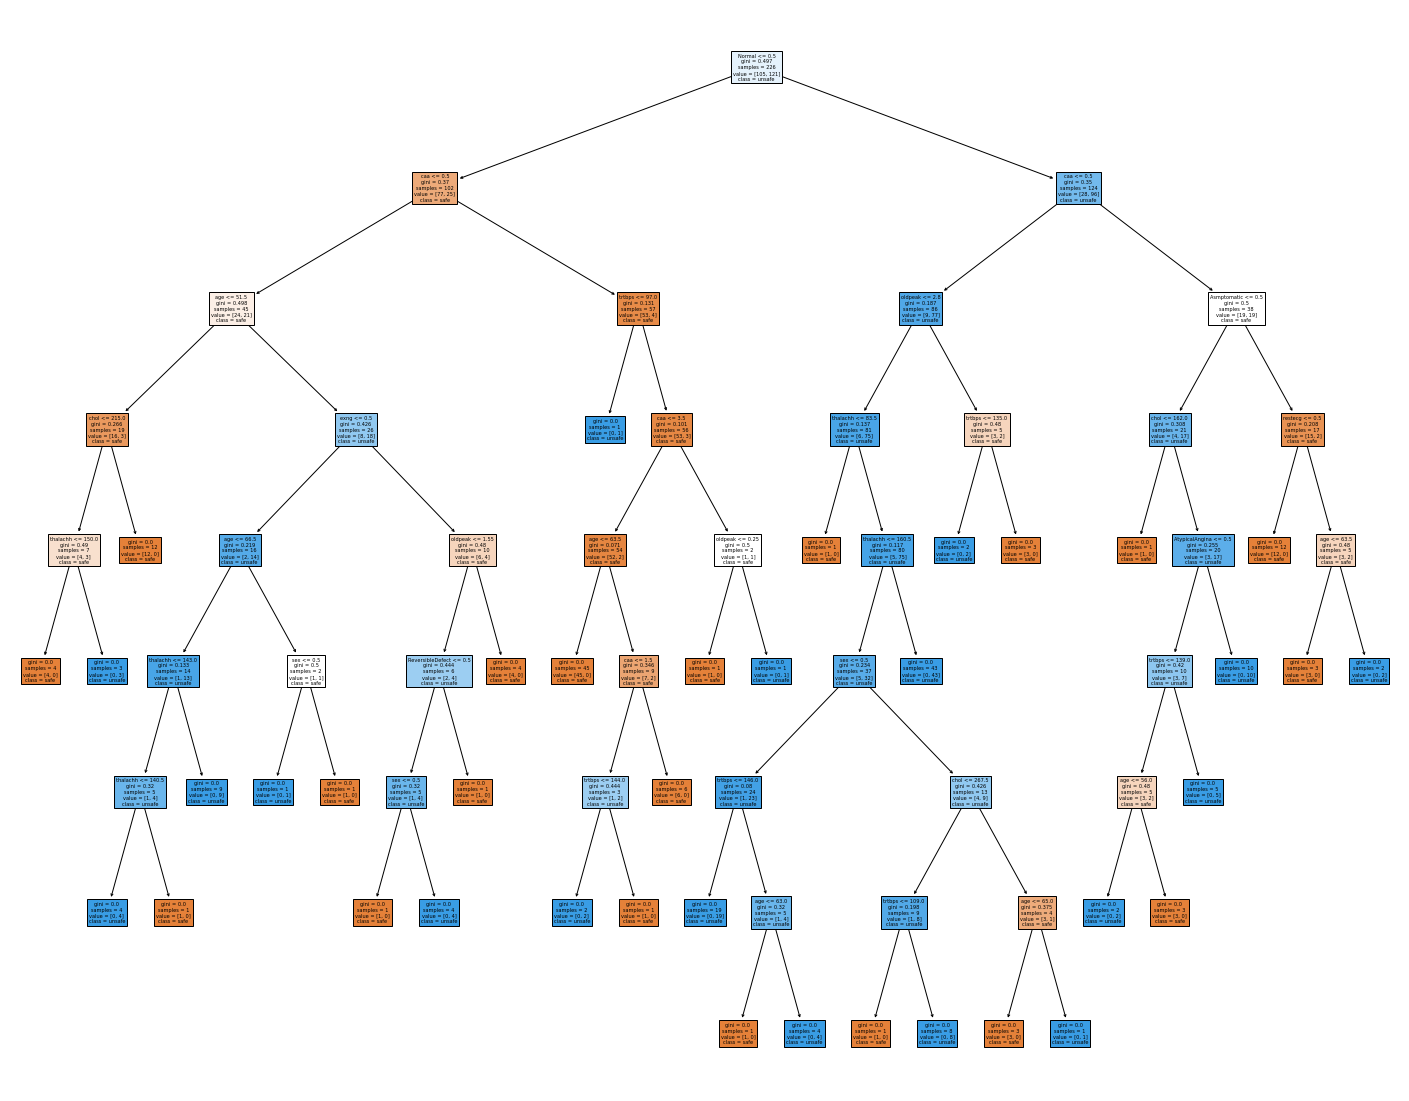

In [49]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(tree_classifier_wo_scaling, feature_names=X_feature_names, class_names = ['safe', 'unsafe'], \
           filled=True)
plt.show()

Now I want to look into post pruning of Decision trees to overcome overfitting.  

DecisionTreeClassifier.cost_complexity_pruning_path in sklearn returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

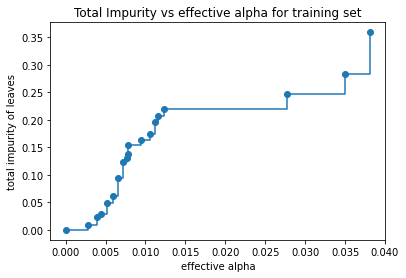

In [50]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train_wo_scale, y_train_wo_scale)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [51]:
ccp_alphas, impurities

(array([0.        , 0.00282694, 0.00387168, 0.00442478, 0.00517541,
        0.00589971, 0.00660029, 0.00716393, 0.00768191, 0.00778772,
        0.00780843, 0.00943953, 0.01061947, 0.01117839, 0.01152729,
        0.01228727, 0.02774533, 0.03498452, 0.03812601, 0.13864465]),
 array([0.        , 0.00848083, 0.02396755, 0.02839233, 0.04909397,
        0.06089338, 0.09389486, 0.12255057, 0.13023248, 0.1380202 ,
        0.15363706, 0.16307659, 0.17369606, 0.19605284, 0.20758013,
        0.2198674 , 0.24761273, 0.28259725, 0.35884928, 0.49749393]))

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [52]:

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_wo_scale, y_train_wo_scale)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13864465296323447


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

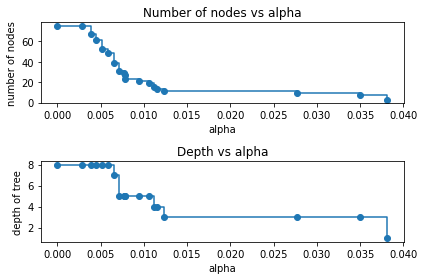

In [53]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 79% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.012 maximizes the testing accuracy.

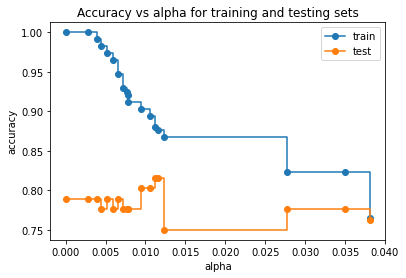

In [54]:
train_scores = [clf.score(X_train_wo_scale, y_train_wo_scale) for clf in clfs]
test_scores = [clf.score(X_test_wo_scale, y_test_wo_scale) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Looking at the graph below we observe the relationship between alpha and accuracy. The sweet spot is somewhere around 0.011 alpha

Text(0, 0.5, 'Accuracy scores')

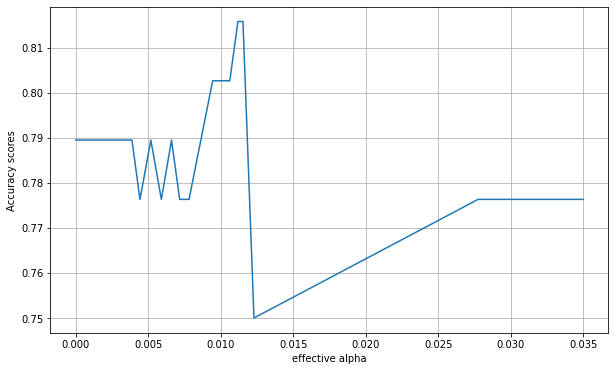

In [55]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test_wo_scale, clf.predict(X_test_wo_scale)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [56]:
ccp_alphas, acc_scores

(array([0.        , 0.00282694, 0.00387168, 0.00442478, 0.00517541,
        0.00589971, 0.00660029, 0.00716393, 0.00768191, 0.00778772,
        0.00780843, 0.00943953, 0.01061947, 0.01117839, 0.01152729,
        0.01228727, 0.02774533, 0.03498452, 0.03812601]),
 [0.7894736842105263,
  0.7894736842105263,
  0.7894736842105263,
  0.7763157894736842,
  0.7894736842105263,
  0.7763157894736842,
  0.7894736842105263,
  0.7763157894736842,
  0.7763157894736842,
  0.7763157894736842,
  0.7763157894736842,
  0.8026315789473685,
  0.8026315789473685,
  0.8157894736842105,
  0.8157894736842105,
  0.75,
  0.7763157894736842,
  0.7763157894736842,
  0.7631578947368421])

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

tree_classifier_wo_scaling = DecisionTreeClassifier(criterion = 'gini', random_state = 0, ccp_alpha=0.0112)
tree_classifier_wo_scaling.fit(X_train_wo_scale, y_train_wo_scale)

y_pred_tree_wo_scale = tree_classifier_wo_scaling.predict(X_test_wo_scale)

print("Confusion Matric:\n{}".format(confusion_matrix(y_test_wo_scale, y_pred_tree_wo_scale)))

print("Accuracy: {}".format(accuracy_score(y_test_wo_scale, y_pred_tree_wo_scale)))

Confusion Matric:
[[26  7]
 [ 7 36]]
Accuracy: 0.8157894736842105


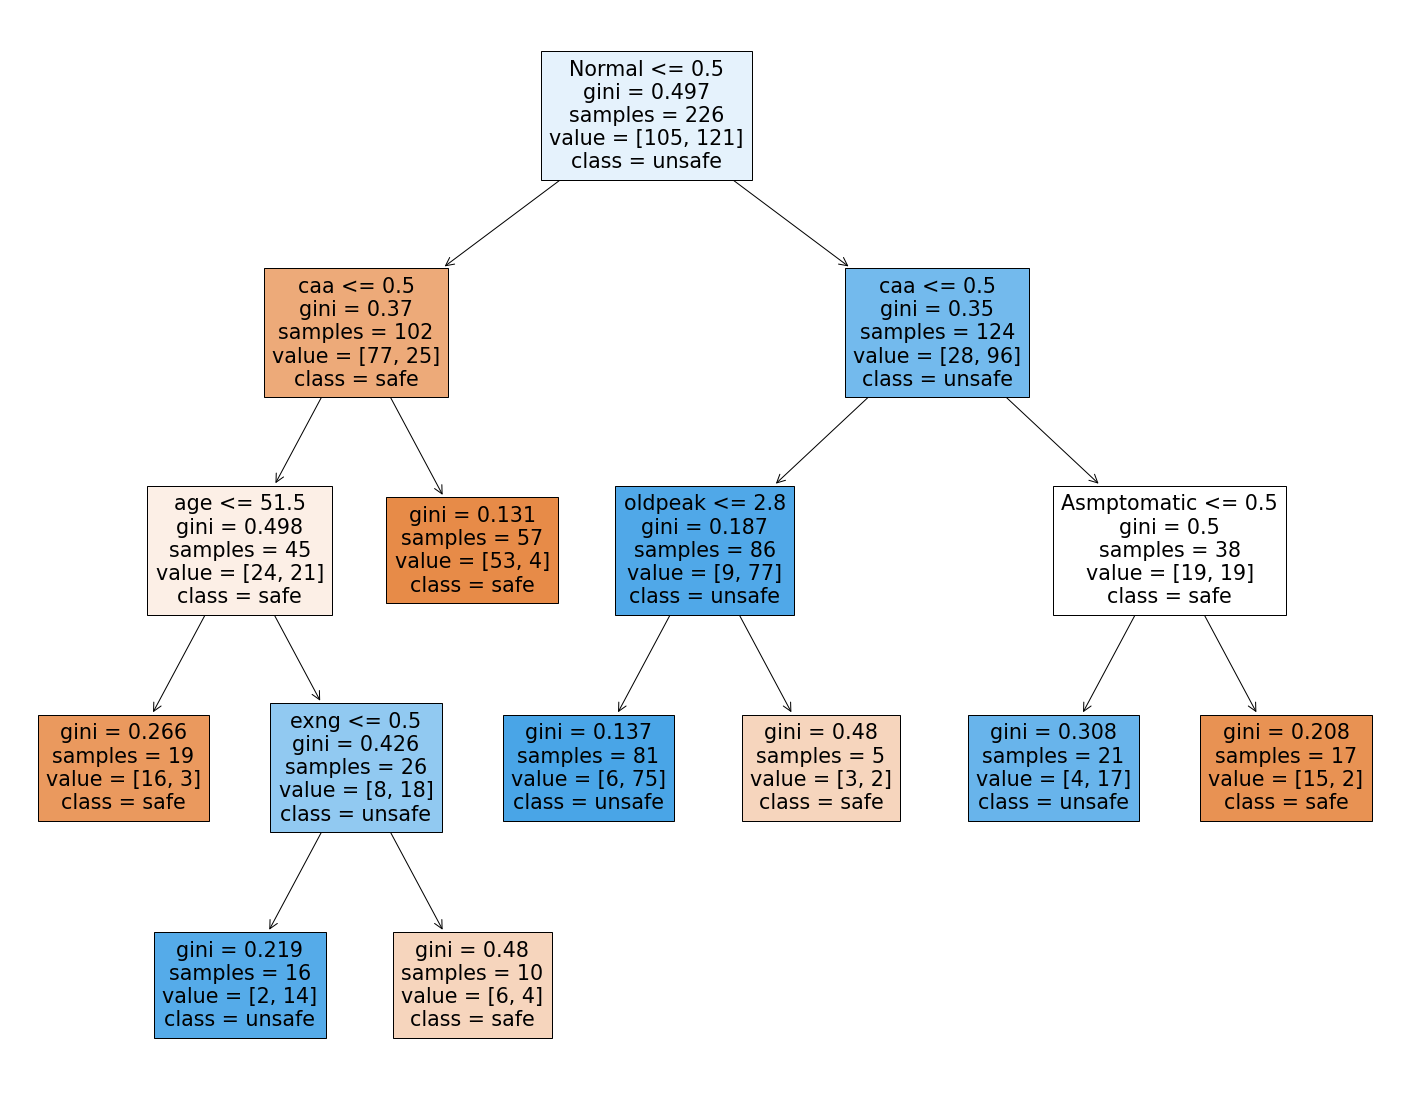

In [58]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
plot_tree(tree_classifier_wo_scaling, feature_names=X_feature_names, class_names = ['safe', 'unsafe'], \
           filled=True)
plt.show()

In [59]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(tree_classifier_wo_scaling, X_train_wo_scale, y_train_wo_scale,
                target_name="target",
                feature_names=X_feature_names,
                class_names=list(y_train_wo_scale))

viz

ImportError: cannot import name 'dtreeviz' from 'dtreeviz.trees' (/Users/shipsinh/opt/anaconda3/lib/python3.9/site-packages/dtreeviz/trees.py)

In [61]:
from sklearn.feature_selection import RFE
selector = RFE(tree_classifier_wo_scaling, step=1)
selector.fit(X_train_wo_scale, y_train_wo_scale)

print("Ranking of features: {}".format(selector.ranking_))

X_Selected_features = X_train_wo_scale[:,selector.support_]
print("Boolean value for selected features: {}".format(selector.support_))

#Re-training the model to see effect
tree_classifier_wo_scaling.fit(X_Selected_features, y_train_wo_scale)

y_pred_tree_wo_scale = tree_classifier_wo_scaling.predict(X_test_wo_scale[:,selector.support_])

print("Confusion Matrix:\n{}".format(confusion_matrix(y_test_wo_scale, y_pred_tree_wo_scale)))

print("Accuracy: {}".format(accuracy_score(y_test_wo_scale, y_pred_tree_wo_scale)))

Ranking of features: [ 1  8  7  6  5  4  3  1 10  9  2  1  1  1  1  1  1  1]
Boolean value for selected features: [ True False False False False False False  True False False False  True
  True  True  True  True  True  True]
Confusion Matric:
[[26  7]
 [ 7 36]]
Accuracy: 0.8157894736842105


In [60]:
X_train_wo_scale

array([[  1. ,   0. ,   0. , ..., 206. , 132. ,   2.4],
       [  1. ,   0. ,   0. , ..., 282. ,  95. ,   2. ],
       [  0. ,   1. ,   0. , ..., 232. , 165. ,   1.6],
       ...,
       [  0. ,   0. ,   1. , ..., 193. , 162. ,   1.9],
       [  0. ,   1. ,   0. , ..., 257. , 156. ,   0. ],
       [  0. ,   1. ,   0. , ..., 224. , 173. ,   3.2]])

**E. Random Forest**

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

y_pred_rf = classifier_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
accuracy_score(y_true=y_test,y_pred=y_pred_rf)

[[26  7]
 [ 4 39]]


0.8552631578947368

In [64]:
# Using gini as cost function
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
classifier_rf.fit(X_train, y_train)

y_pred_rf = classifier_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
accuracy_score(y_true=y_test,y_pred=y_pred_rf)

[[26  7]
 [ 4 39]]


0.8552631578947368

I want to find the most optimised Random Forest model. RandomSearchCV and GridSearchCV provide this option. Random Search CV will pick random parameter values from the user provided range and values. Grid Search CV will test all combinations of provided parameter options.

I opted for Grid Search Cross Validation for testing out Random Forest model parameters and finding the best performing parameters (**Note: Please don't run the below code again unless needed because it takes time to run**)

In [72]:
# Let's try hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'n_estimators': [100, 200, 250],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [3, 5, 10, 15],
    'max_features': ['sqrt', 'log2']
}


# Performing Grid search with cross validation
grid = GridSearchCV(classifier_rf, parameter_grid, cv =10)
grid.fit(X_train, y_train)

# grid.verbose()

print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 250}


In [74]:
best_model = grid.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(accuracy)

0.8552631578947368


**B. KNN**

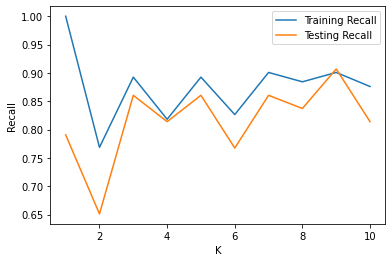

In [43]:
# Plot recall vs k
train_recall = []
test_recall = []

k_values = range(1, 11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_recall.append(recall_score(y_train, knn.predict(X_train)))
    test_recall.append(recall_score(y_test, knn.predict(X_test)))

plt.plot(k_values, train_recall, label='Training Recall')
plt.plot(k_values, test_recall, label='Testing Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
scoring_metric = 'recall' # Scoring metric for grid search. By default it takes average of scores 
                            # across accuracy, precision, recall, F1-score
KNN = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(KNN, params, cv=11, scoring=scoring_metric)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best score: 0.8925619834710742


In [42]:
# Train KNN model with optimal hyperparameters
KNN = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'], 
                           weights=grid_search.best_params_['weights'], 
                           p=grid_search.best_params_['p'])
KNN.fit(X_train, y_train)

# Make predictions on test set
y_pred = KNN.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))


recall = recall_score(y_test, y_pred)
print('Recall:', recall)

Accuracy: 0.8421052631578947
Recall: 0.9069767441860465


**D. SVM**

In [44]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', random_state = 0)
classifier_svc.fit(X_train, y_train)

y_pred_svm = classifier_svc.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

# Accuracy score
accuracy_score(y_true=y_test, y_pred=y_pred_svm)

[[25  8]
 [ 6 37]]


0.8157894736842105